In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [2]:
heart_df = pd.read_csv ("C:\\MULTIPLEDISEASEPREDICTION\\data\\heart.csv")

In [3]:
heart_df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [4]:
heart_df['Sex'] = heart_df['Sex'].map({'M': 0, 'F': 1}).astype(int)

In [5]:
heart_df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
heart_df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [7]:
heart_df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [8]:
heart_df['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [9]:
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'N': 0, 'Y': 1}).astype(int)

In [10]:
heart_df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
heart_df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000


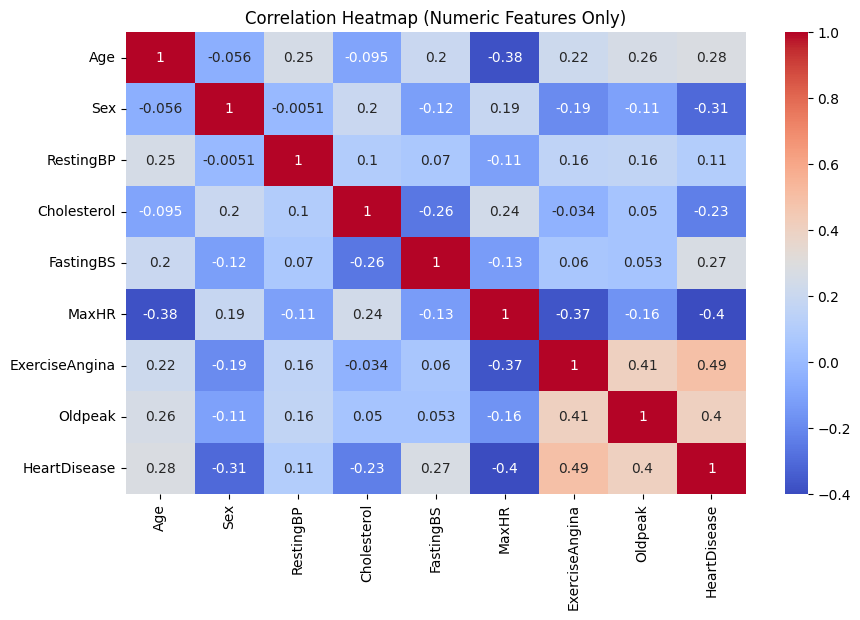

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = heart_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

In [14]:
for col in ['RestingBP', 'Cholesterol']:
    heart_df[col] = heart_df[col].replace(0, np.nan)
    heart_df[col] = heart_df[col].fillna(heart_df[col].median())
 

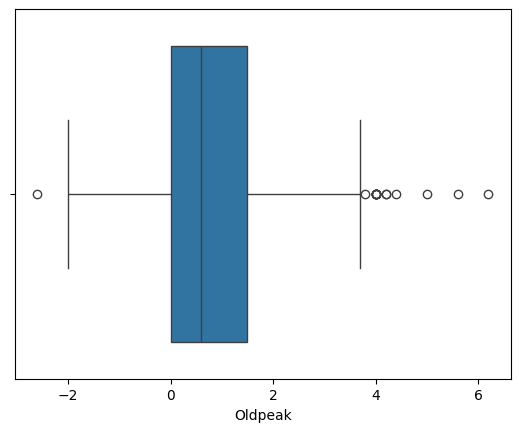

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x = heart_df['Oldpeak'])
plt.show()


In [16]:
Q1 = heart_df['Cholesterol'].quantile(0.25)
Q3 = heart_df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

upper_limit
lower_limit


np.float64(134.5)

In [17]:
heart_df['Cholesterol'] = heart_df['Cholesterol'].clip(lower=134, upper=350)


In [18]:
heart_df['cholesterol_outlier'] = ((heart_df['Cholesterol'] < 134) | (heart_df['Cholesterol'] > 350)).astype(int)


In [19]:
Q1_old = heart_df['Oldpeak'].quantile(0.25)
Q3_old = heart_df['Oldpeak'].quantile(0.75)
IQR_old = Q3_old - Q1_old

lower_limit_old = Q1_old - 1.5 * IQR_old
upper_limit_old = Q3_old + 1.5 * IQR_old

upper_limit_old


np.float64(3.75)

In [20]:
heart_df[heart_df['Oldpeak'] > upper_limit_old].shape

(15, 13)

In [21]:
heart_df['Oldpeak'] = heart_df['Oldpeak'].clip(lower=0)


In [22]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cholesterol_outlier
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1,0
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1,0
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110.0,264.0,0,Normal,132,0,1.2,Flat,1,0
914,68,0,ASY,144.0,193.0,1,Normal,141,0,3.4,Flat,1,0
915,57,0,ASY,130.0,134.0,0,Normal,115,1,1.2,Flat,1,0
916,57,1,ATA,130.0,236.0,0,LVH,174,0,0.0,Flat,1,0


In [23]:
heart_df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,cholesterol_outlier
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0
mean,53.510893,0.210240,132.538126,241.326797,0.233115,136.809368,0.404139,0.901307,0.553377,0.0
std,9.432617,0.407701,17.990127,45.336954,0.423046,25.460334,0.490992,1.045100,0.497414,0.0
min,28.000000,0.000000,80.000000,134.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.0
25%,47.000000,0.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.0
50%,54.000000,0.000000,130.000000,237.000000,0.000000,138.000000,0.000000,0.600000,1.000000,0.0
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.0
max,77.000000,1.000000,200.000000,350.000000,1.000000,202.000000,1.000000,6.200000,1.000000,0.0


In [24]:
heart_df[heart_df['Oldpeak'] > upper_limit_old]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cholesterol_outlier
68,52,0,ASY,160.0,246.0,0,ST,82,1,4.0,Flat,1,0
166,50,0,ASY,140.0,231.0,0,ST,140,1,5.0,Flat,1,0
500,65,0,ASY,136.0,248.0,0,Normal,140,1,4.0,Down,1,0
521,61,0,ASY,120.0,282.0,0,ST,135,1,4.0,Down,1,0
537,74,0,ASY,150.0,258.0,1,ST,130,1,4.0,Down,1,0
559,64,0,ASY,134.0,273.0,0,Normal,102,1,4.0,Down,1,0
624,63,1,ASY,150.0,350.0,0,LVH,154,0,4.0,Flat,1,0
702,59,0,TA,178.0,270.0,0,LVH,145,0,4.2,Down,0,0
732,56,1,ASY,200.0,288.0,1,LVH,133,1,4.0,Down,1,0
771,55,0,ASY,140.0,217.0,0,Normal,111,1,5.6,Down,1,0


In [25]:
heart_df['Oldpeak_outlier'] = (heart_df['Oldpeak'] > upper_limit_old).astype(int)


In [26]:
heart_df['Oldpeak_outlier'].value_counts()

Oldpeak_outlier
0    903
1     15
Name: count, dtype: int64

In [27]:
heart_df.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,cholesterol_outlier,Oldpeak_outlier
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.0,918.000000
mean,53.510893,0.210240,132.538126,241.326797,0.233115,136.809368,0.404139,0.901307,0.553377,0.0,0.016340
std,9.432617,0.407701,17.990127,45.336954,0.423046,25.460334,0.490992,1.045100,0.497414,0.0,0.126848
min,28.000000,0.000000,80.000000,134.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,47.000000,0.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,54.000000,0.000000,130.000000,237.000000,0.000000,138.000000,0.000000,0.600000,1.000000,0.0,0.000000
75%,60.000000,0.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,0.0,0.000000
max,77.000000,1.000000,200.000000,350.000000,1.000000,202.000000,1.000000,6.200000,1.000000,0.0,1.000000


In [28]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,cholesterol_outlier,Oldpeak_outlier
0,40,0,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0,0,0
1,49,1,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1,0,0
2,37,0,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0,0,0
3,48,1,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1,0,0
4,54,0,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110.0,264.0,0,Normal,132,0,1.2,Flat,1,0,0
914,68,0,ASY,144.0,193.0,1,Normal,141,0,3.4,Flat,1,0,0
915,57,0,ASY,130.0,134.0,0,Normal,115,1,1.2,Flat,1,0,0
916,57,1,ATA,130.0,236.0,0,LVH,174,0,0.0,Flat,1,0,0


In [30]:
heart_df.to_csv('data/cleaned_heart.csv',index=False,header=True)